In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pylab import rcParams
import re
import os
import time
from datetime import datetime

In [3]:
df = pd.read_csv("readings.csv")
display(df.head())

,cpu_speed,volts,fan_speed,cpu_pct,load_avg,temp
0,1.500013,0.7200,3019.0,5.1,0.577148,46.6
1,2.400024,0.8806,3020.0,23.3,0.577148,46.6
2,2.400020,0.8806,3021.0,1.9,0.577148,47.2
3,2.400020,0.8806,3020.0,1.9,0.577148,47.2
4,2.400030,0.8806,3021.0,1.0,0.577148,46.6


<Figure size 640x480 with 0 Axes>

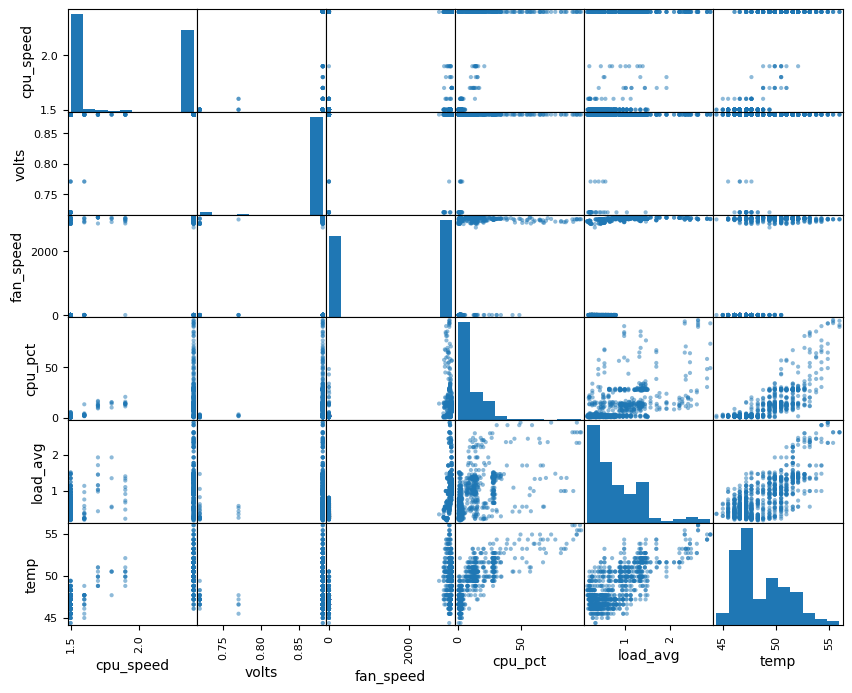

In [4]:
plt.clf()
scatter_matrix(df.sample(1000), figsize=(10, 8))
plt.show()

In [5]:
display(df.info())
display(df.corr())

# We can strengthen our correlation by applying a rolling average to certain columns.
df_adjusted = df.copy()
rolling_cols = ['cpu_speed', 'volts', 'fan_speed', 'cpu_pct']
df_adjusted[rolling_cols] = df_adjusted[rolling_cols].rolling(window=5).mean()

display(df_adjusted.info())
display(df_adjusted.corr())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cpu_speed  2500 non-null   float64
 1   volts      2500 non-null   float64
 2   fan_speed  2500 non-null   float64
 3   cpu_pct    2500 non-null   float64
 4   load_avg   2500 non-null   float64
 5   temp       2500 non-null   float64
dtypes: float64(6)
memory usage: 117.3 KB


None

,cpu_speed,volts,fan_speed,cpu_pct,load_avg,temp
cpu_speed,1.000000,0.177681,0.702697,0.606381,0.587484,0.801637
volts,0.177681,1.000000,0.045159,0.112846,0.131240,0.133572
fan_speed,0.702697,0.045159,1.000000,0.480698,0.650322,0.648469
cpu_pct,0.606381,0.112846,0.480698,1.000000,0.599708,0.809144
load_avg,0.587484,0.131240,0.650322,0.599708,1.000000,0.766714
temp,0.801637,0.133572,0.648469,0.809144,0.766714,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cpu_speed  2496 non-null   float64
 1   volts      2496 non-null   float64
 2   fan_speed  2496 non-null   float64
 3   cpu_pct    2496 non-null   float64
 4   load_avg   2500 non-null   float64
 5   temp       2500 non-null   float64
dtypes: float64(6)
memory usage: 117.3 KB


None

,cpu_speed,volts,fan_speed,cpu_pct,load_avg,temp
cpu_speed,1.000000,0.266795,0.727922,0.650388,0.614881,0.824529
volts,0.266795,1.000000,0.073997,0.178357,0.201503,0.205284
fan_speed,0.727922,0.073997,1.000000,0.506010,0.655393,0.645568
cpu_pct,0.650388,0.178357,0.506010,1.000000,0.644502,0.836964
load_avg,0.614881,0.201503,0.655393,0.644502,1.000000,0.766714
temp,0.824529,0.205284,0.645568,0.836964,0.766714,1.000000


# Basic Linear Regression

'Train length: 1996, Test length: 500'

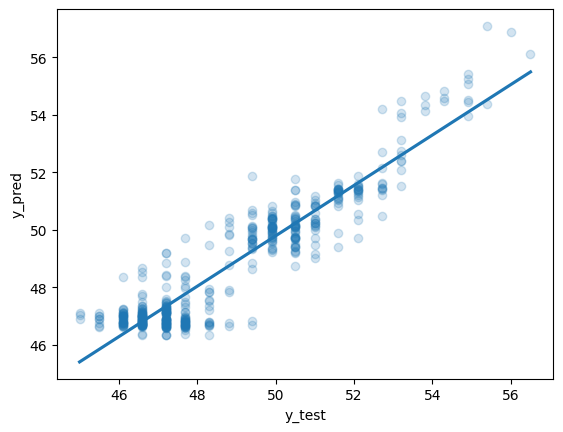

'Mean squared error: 0.67'

'Coefficient of determination: 0.88'

In [6]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Grab the adjusted data, but drop any rows with missing data.
# The rows with missing data were created by the rolling average.
df_data = df_adjusted.dropna(how="any")

# Try it first with one column, then with more than one. Comment out
# the one you don't want to use and uncomment the one you do.
# We know from the histograms that volts is probably useless as a predictor!
# linreg_feature_cols = ["load_avg"]
linreg_feature_cols = ["cpu_pct", "load_avg", "cpu_speed", "fan_speed"]

# Separate the feature data from the target data we want to predict.
X = df_data[linreg_feature_cols]
y = df_data.temp

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
display(f"Train length: {len(X_train)}, Test length: {len(X_test)}")

plt.clf()

linreg = make_pipeline(StandardScaler(), 
                        LinearRegression()) 
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)

sns.regplot(x=y_test, y=y_pred, ci=None, scatter_kws={'alpha':0.2})
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

display(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
display(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

# Basic Logistic Regression

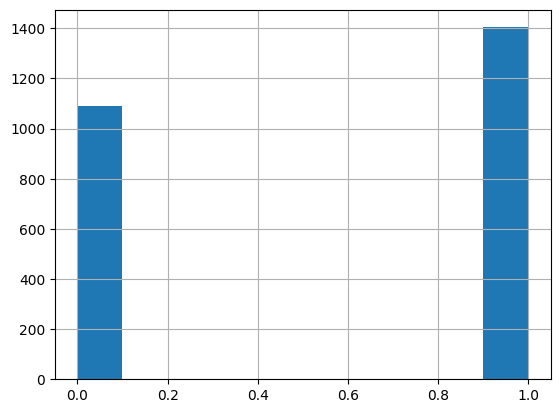

,cpu_speed,volts,fan_speed,cpu_pct,load_avg,temp,fan_state
cpu_speed,1.000000,0.266795,0.727922,0.650388,0.614881,0.824529,0.728694
volts,0.266795,1.000000,0.073997,0.178357,0.201503,0.205284,0.067758
fan_speed,0.727922,0.073997,1.000000,0.506010,0.655393,0.645568,0.991132
cpu_pct,0.650388,0.178357,0.506010,1.000000,0.644502,0.836964,0.509066
load_avg,0.614881,0.201503,0.655393,0.644502,1.000000,0.766699,0.638073
temp,0.824529,0.205284,0.645568,0.836964,0.766699,1.000000,0.642958
fan_state,0.728694,0.067758,0.991132,0.509066,0.638073,0.642958,1.000000


'Train length: 1996, Test length: 500'

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       229
           1       0.92      0.85      0.88       271

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



array([[210,  19],
       [ 41, 230]])

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

df_data = df_adjusted.copy().dropna(how="any")

# Convert fan speed into an on/off indicator.
df_data["fan_state"] = df_data.fan_speed.apply(lambda x: 1 if x > 0 else 0)
plt.clf()
df_data.fan_state.hist()
plt.show()

display(df_data.corr())

# logreg_feature_cols = ["volts", "cpu_pct", "load_avg", "cpu_speed", "temp"] # NOT fan speed!
logreg_feature_cols = ["load_avg", "temp"] # NOT fan speed!

X = df_data[logreg_feature_cols].values
y = df_data.fan_state.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
display(f"Train length: {len(X_train)}, Test length: {len(X_test)}")

logreg = make_pipeline(StandardScaler(), 
                       LogisticRegression()) 
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(metrics.classification_report(y_test, y_pred))
display(metrics.confusion_matrix(y_test, y_pred))

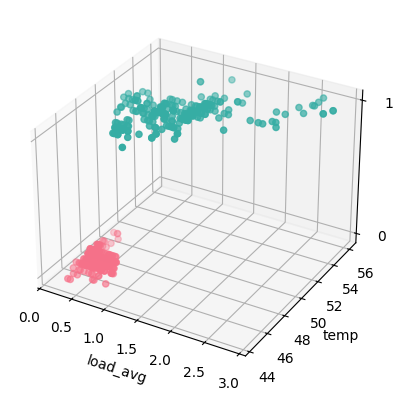

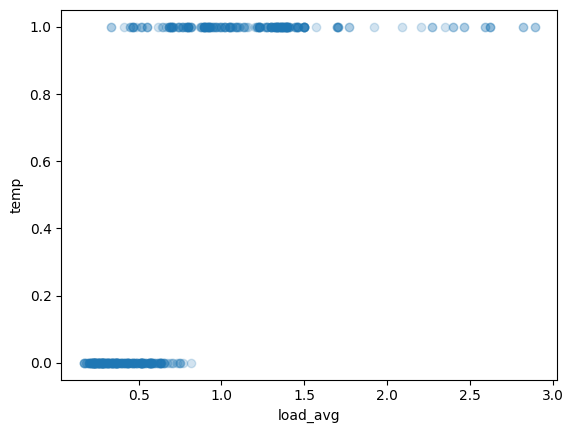

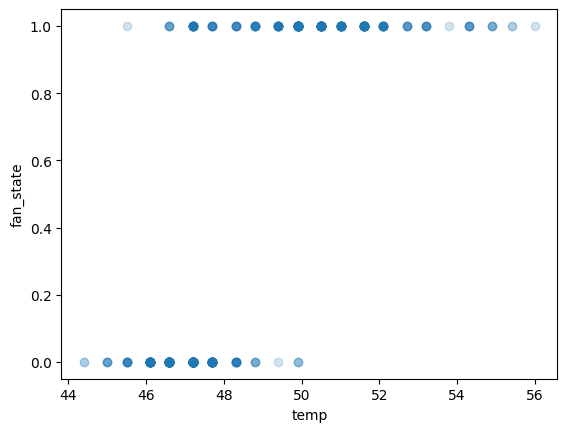

In [8]:
from matplotlib.colors import ListedColormap

plt.clf()

ax = plt.axes(projection = '3d')

x = np.array(X_test).T[0]
y = np.array(X_test).T[1]
z = y_pred

ax.set_xlabel("load_avg")
ax.set_ylabel("temp")
ax.set_zlabel("fan_state")
ax.set_zticks([0,1])

cmap = ListedColormap(sns.color_palette("husl", 2).as_hex())
ax.scatter(x, y, z, c=z, cmap=cmap)

plt.show()

plt.clf()
ax = plt.axes()
ax.scatter(np.array(X_test).T[0], y_pred, alpha=0.2)
plt.xlabel('load_avg')
plt.ylabel('temp')
plt.show()

plt.clf()
ax = plt.axes()
ax.scatter(np.array(X_test).T[1], y_pred, alpha=0.2)
plt.xlabel('temp')
plt.ylabel('fan_state')
plt.show()


# Tensorflow: Neural network regression

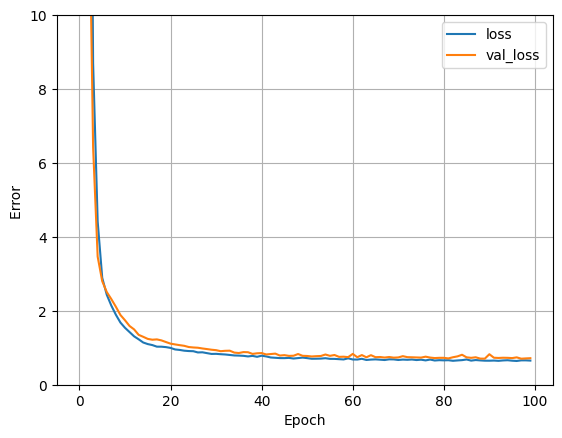

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6461 - r2_score: 0.8508 


[0.6310827136039734, 0.8680696487426758]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


[]

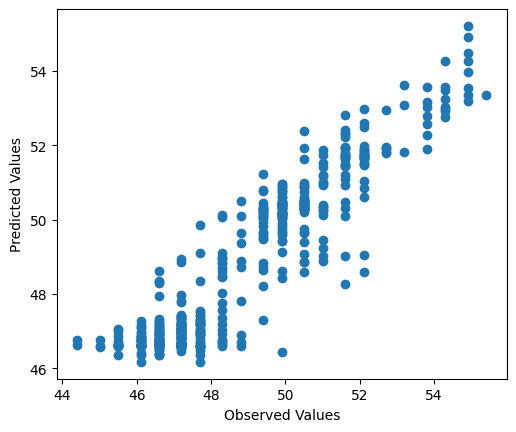

In [124]:
import tensorflow as tf

def plot_loss(history, ylim=10):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, ylim])
  plt.xlabel('Epoch')
  plt.ylabel('Error ')
  plt.legend()
  plt.grid(True)

feature_cols = ["cpu_pct", "load_avg", "cpu_speed", "fan_speed"]

# Separate the feature data from the target data we want to predict.
X = df_data[feature_cols]
y = df_data.temp

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
    
dnn_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

dnn_model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001),
                  metrics=[tf.keras.metrics.R2Score()]
)

history = dnn_model.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

plot_loss(history)
plt.show()

display(dnn_model.evaluate(X_test, y_test, verbose=1))

y_pred = dnn_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.plot()

# Tensorflow: Neural network classification

In [138]:
# see https://learning.oreilly.com/library/view/hands-on-machine-learning/9781098125967/ch10.html#id159

feature_cols = ["load_avg", "temp"]
# feature_cols = ["cpu_pct", "load_avg", "cpu_speed", "temp"]

# Separate the feature data from the target data we want to predict.
X = df_data[feature_cols]
y = df_data.fan_state

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
    
dnn_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
    #tf.keras.layers.Dense(2, activation="softmax") # use this for "sparse labels"
])

# dnn_model.compile(loss='sparse_categorical_crossentropy', # use this for "sparse labels"
#                   optimizer="sgd",
#                   metrics=["accuracy"]
# )
dnn_model.compile(loss='binary_crossentropy',
                  optimizer="adam",
                  metrics=["accuracy"]
)

history = dnn_model.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

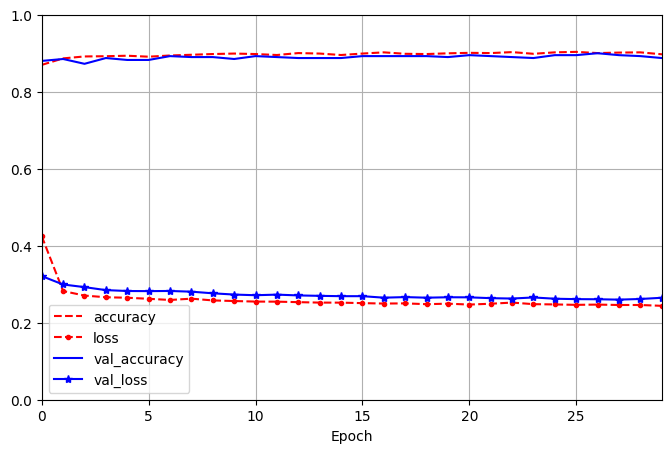

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8744 - loss: 0.2658 


[0.26067352294921875, 0.8840000033378601]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1.  , 1.  , 0.15, 1.  , 0.05, 1.  , 1.  , 0.18, 0.22, 1.  , 0.07,
       0.71, 1.  , 1.  , 0.11, 0.07, 0.98, 0.14, 1.  , 1.  ],
      dtype=float32)>

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1])

[]

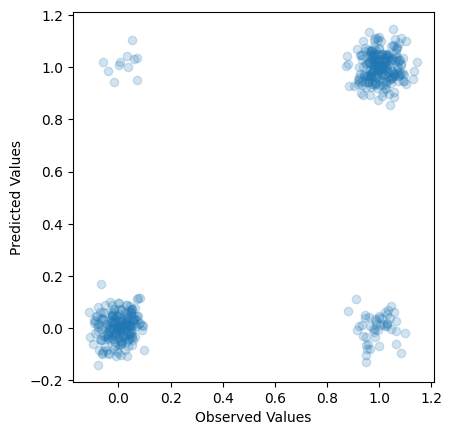

In [139]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

display(dnn_model.evaluate(X_test, y_test, verbose=1))

y_proba = dnn_model.predict(X_test)
# y_pred = y_proba.argmax(axis=-1) # use this for "sparse labels"
y_pred = np.array([1 if x >= 0.5 else 0 for x in tf.squeeze(y_proba)])

display(tf.squeeze(y_proba.round(2))[:20])
display(y_pred[:20])

def rand_jitter(arr):
    stdev = .05 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

a = plt.axes(aspect='equal')
plt.scatter(rand_jitter(y_test), rand_jitter(y_pred), alpha=0.2)
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.plot()